Import Necessary Libaries


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

Import Dataset

In [5]:
df=pd.read_csv("Titanic-Dataset.csv")

Basic Information

In [6]:
df.shape

(891, 12)

In [7]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [42]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Date,Cabin_Assigned
871,872.0,1.0,1.0,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,0.582701,0.333333,0.25,11751,0.102579,S,NaT,1
872,873.0,0.0,1.0,"Carlsson, Mr. Frans Olof",male,0.405665,0.000000,0.00,695,0.009759,S,NaT,1
879,880.0,1.0,1.0,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,0.696510,0.000000,0.25,11767,0.162314,C,NaT,1
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,0.228629,0.000000,0.00,112053,0.058556,S,NaT,1
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,0.317147,0.000000,0.00,111369,0.058556,C,NaT,1


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


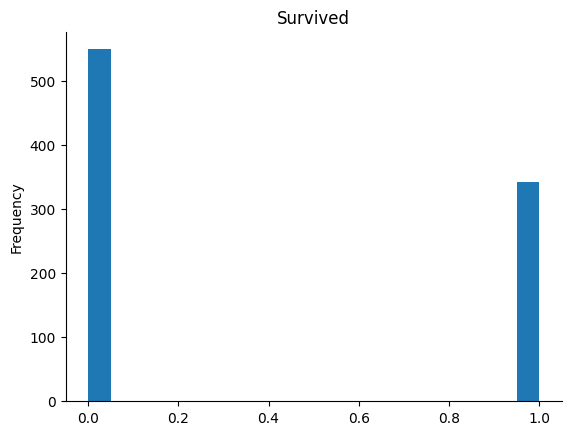

In [10]:
from matplotlib import pyplot as plt
df['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

Missing Values Anaylsis

In [11]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
df.dropna(inplace = True)

print(df.to_string())

     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch             Ticket      Fare            Cabin Embarked
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0           PC 17599   71.2833              C85        C
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0             113803   53.1000             C123        S
6              7         0       1                                                             McCarthy, Mr. Timothy J    male  54.00      0      0              17463   51.8625              E46        S
10            11         1       3                                                     Sandstrom, Miss. Marguerite Rut  female   4.00      1      1            PP 9549   16.7000            

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df['Date'] = pd.to_datetime(df['Embarked'], format='mixed', errors='coerce')
print(df.to_string())

     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch             Ticket      Fare            Cabin Embarked Date
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0           PC 17599   71.2833              C85        C  NaT
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0             113803   53.1000             C123        S  NaT
6              7         0       1                                                             McCarthy, Mr. Timothy J    male  54.00      0      0              17463   51.8625              E46        S  NaT
10            11         1       3                                                     Sandstrom, Miss. Marguerite Rut  female   4.00      1      1            PP 9549  

In [15]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(numerical_cols)
print(categorical_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [16]:
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
print(num_imputer)

SimpleImputer()


In [17]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
print(cat_imputer)

SimpleImputer(strategy='most_frequent')


In [18]:
print("\nSummary:")
print("The dataset has", df.shape[0], "rows and", df.shape[1], "columns.")
print("There are missing values in several columns, particularly 'Age' and 'Cabin'.")
print("Categorical features like 'Sex', 'Embarked', and 'Pclass' show distinct value distributions.")


Summary:
The dataset has 183 rows and 13 columns.
There are missing values in several columns, particularly 'Age' and 'Cabin'.
Categorical features like 'Sex', 'Embarked', and 'Pclass' show distinct value distributions.


## Data cleaning


In [44]:
from sklearn.preprocessing import MinMaxScaler
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
scaler = MinMaxScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df[numerical_features].describe())

              Age       SibSp       Parch        Fare
count  183.000000  183.000000  183.000000  183.000000
mean     0.439484    0.154827    0.118852    0.153578
std      0.197823    0.214720    0.188654    0.149021
min      0.000000    0.000000    0.000000    0.000000
25%      0.291856    0.000000    0.000000    0.057971
50%      0.443601    0.000000    0.000000    0.111257
75%      0.589024    0.333333    0.250000    0.175668
max      1.000000    1.000000    1.000000    1.000000


## Data visualization

### Subtask:
Visualize outliers in the numerical features of the dataset using boxplots.


**Reasoning**:
Create boxplots for the numerical features 'Age', 'SibSp', 'Parch', and 'Fare' to visualize outliers.



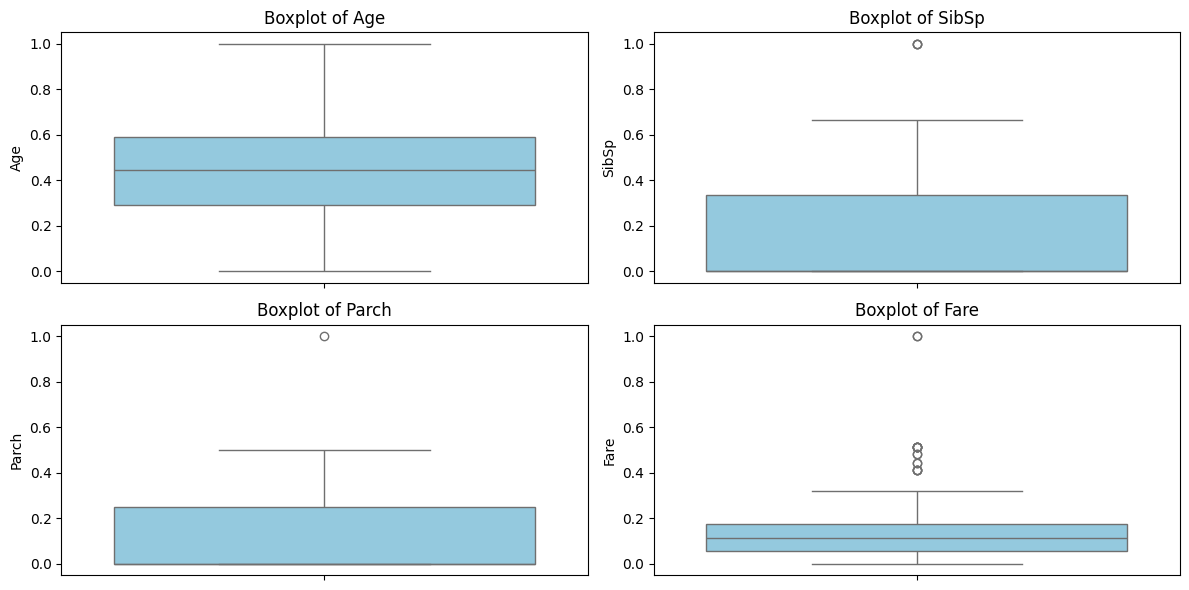

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

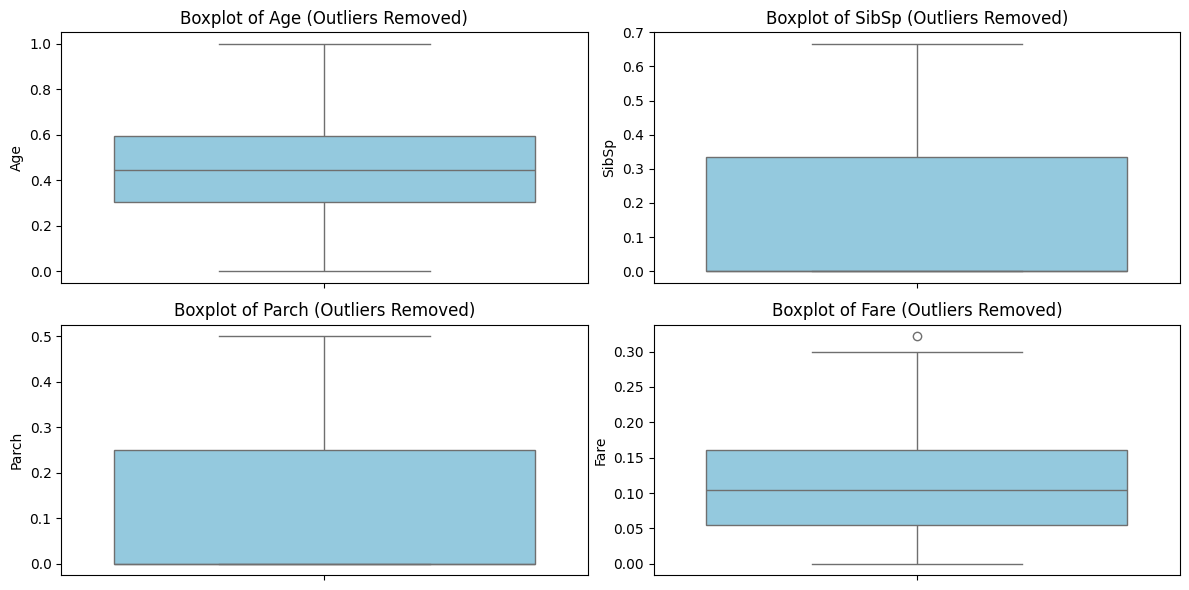

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

df_no_outliers = df.copy()
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]


plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_no_outliers[feature], color='skyblue')
    plt.title(f'Boxplot of {feature} (Outliers Removed)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

Check the outliers

Outliers for PassengerId: []
Outliers for Survived: []
Outliers for Pclass: [3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0]
Outliers for Age: []
Outliers for SibSp: [1.0, 1.0, 1.0]
Outliers for Parch: [1.0]
Outliers for Fare: [0.5133418122566507, 0.5133418122566507, 0.4831284260198326, 0.4831284260198326, 0.5121218935012878, 0.5133418122566507, 0.41282050681475896, 0.5133418122566507, 1.0, 0.41250332793836464, 0.4440992237022602, 0.4440992237022602, 0.41250332793836464, 1.0, 0.5121218935012878, 0.41250332793836464]
Outliers for Cabin_Assigned: []


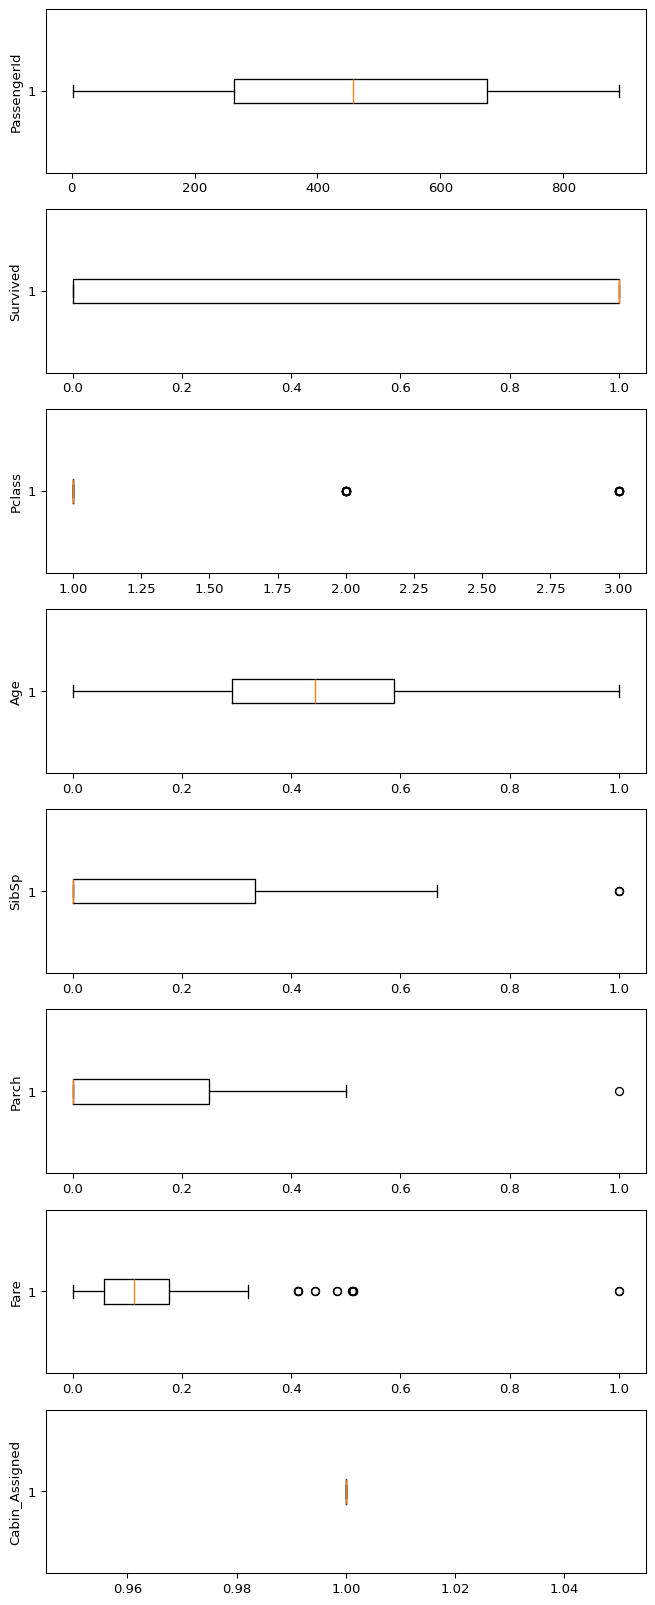

In [33]:
fig, axs = plt.subplots(len(df.select_dtypes(include=np.number).columns), 1, dpi=95, figsize=(7, 17))
i = 0
for col in df.select_dtypes(include=np.number).columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]


    print(f"Outliers for {col}: {outliers.tolist()}")

    i += 1

plt.tight_layout()
plt.show()

<ipython-input-39-dfc13eb07434>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='Set2')  # Use a visually appealing palette


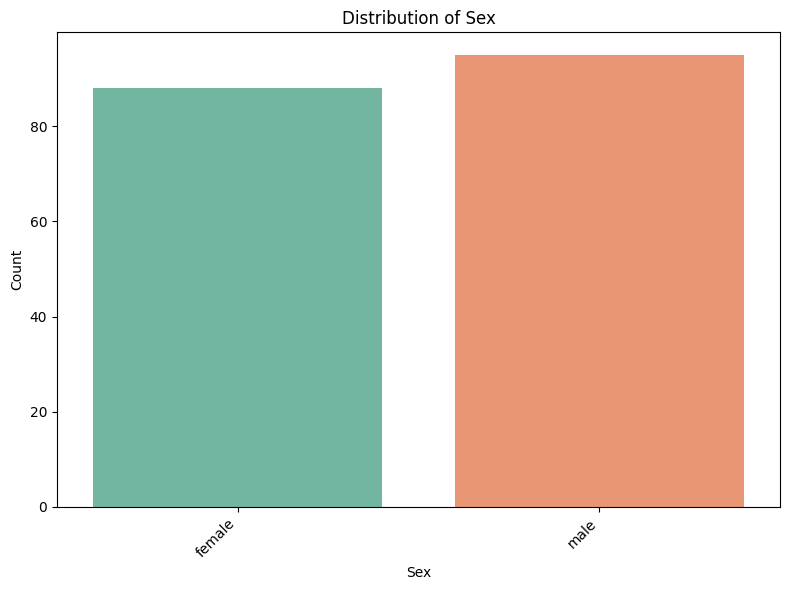

<ipython-input-39-dfc13eb07434>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='Set2')  # Use a visually appealing palette


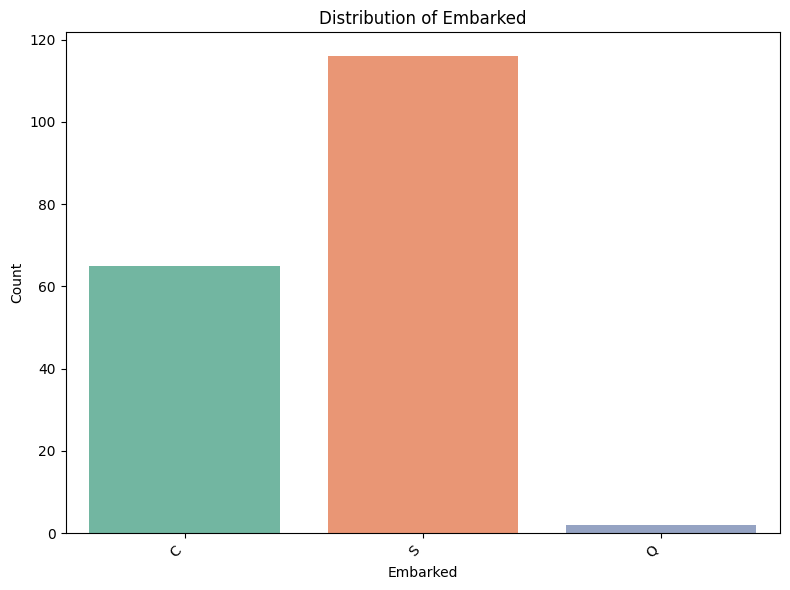

<ipython-input-39-dfc13eb07434>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='Set2')  # Use a visually appealing palette


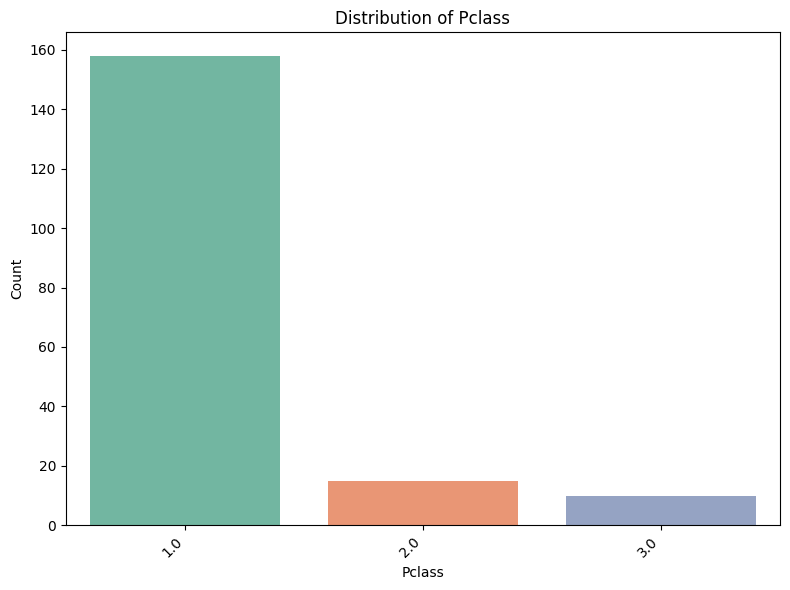

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['Sex', 'Embarked', 'Pclass']
for feature in categorical_features:
    if feature in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=df[feature], palette='Set2')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{feature}' not found in the DataFrame. Skipping plot.")

<ipython-input-35-21e92cc32345>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y=df[feature], data=df, palette='Set3')


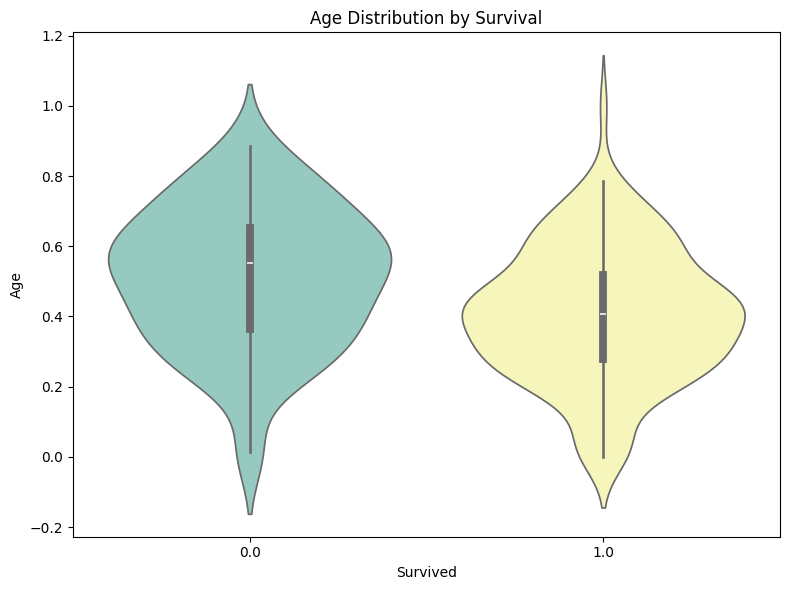

<ipython-input-35-21e92cc32345>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y=df[feature], data=df, palette='Set3')


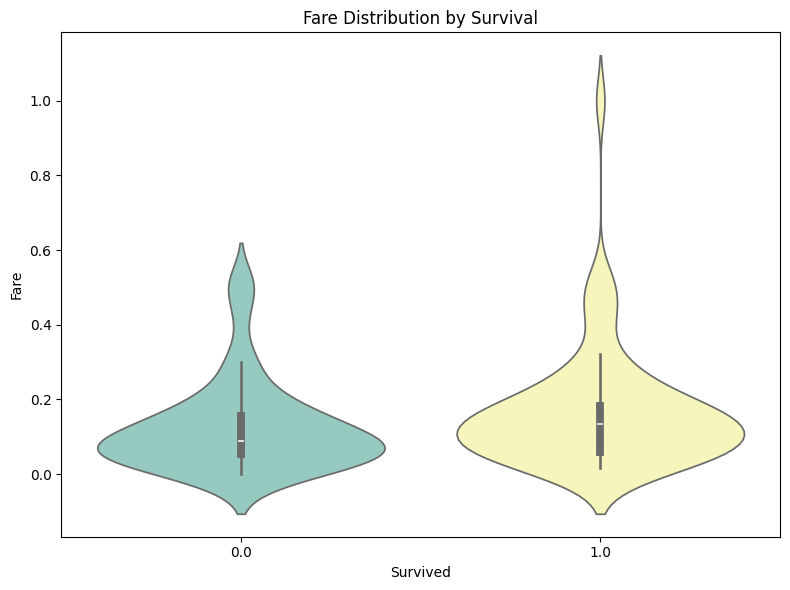

In [35]:
numerical_features = ['Age', 'Fare']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Survived', y=df[feature], data=df, palette='Set3')
    plt.title(f'{feature} Distribution by Survival')
    plt.xlabel('Survived')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


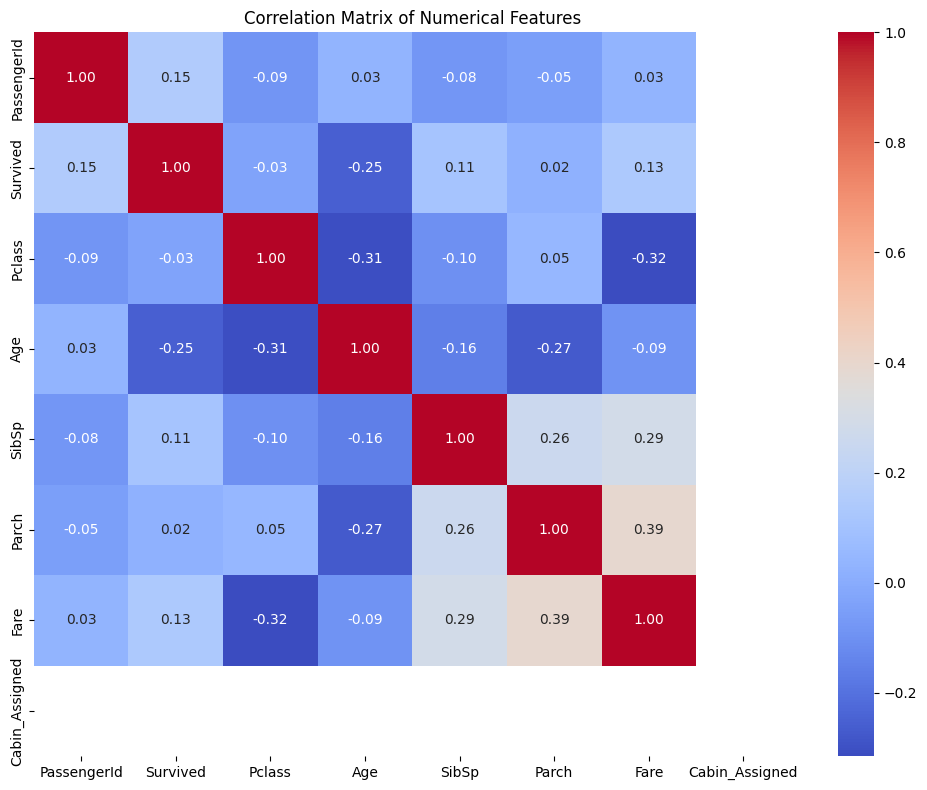

In [40]:
plt.figure(figsize=(10, 8))

numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

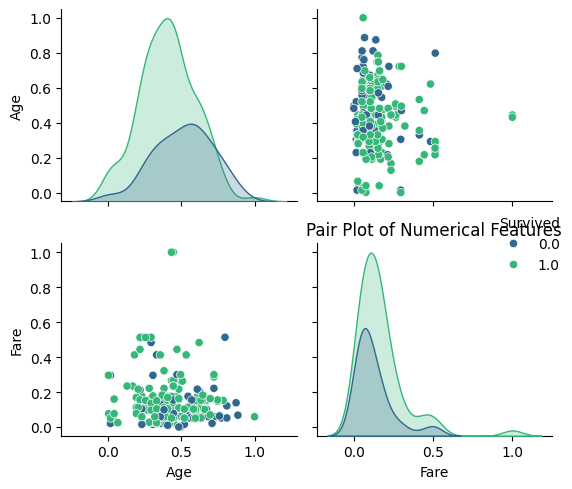

In [41]:
sns.pairplot(df[numerical_features + ['Survived']], hue='Survived', palette='viridis')
plt.title('Pair Plot of Numerical Features')
plt.tight_layout()
plt.show()